# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

2. **Tentang Dataset**

[Financial Risk for Loan Approval](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?select=Loan.csv)

Dataset Sintetik untuk Penilaian Risiko dan Model Persetujuan Pinjaman

Dataset sintetik ini terdiri dari 20.000 data yang mencakup informasi pribadi dan finansial, dirancang untuk mendukung pengembangan model prediktif dalam penilaian risiko. Dataset ini memiliki dua tujuan utama:
1. Regresi Skor Risiko: Memprediksi skor risiko kontinu yang terkait dengan kemungkinan gagal bayar atau ketidakstabilan finansial seseorang.
2. Klasifikasi Biner: Menentukan hasil biner persetujuan pinjaman, apakah seorang pemohon kemungkinan akan disetujui atau ditolak untuk pinjaman.

Dataset ini memberikan landasan yang komprehensif untuk analisis berbasis data yang canggih dan pengambilan keputusan yang lebih akurat.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import ipywidgets as widgets
from IPython.display import display
from tabulate import tabulate
import os

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.simplefilter("ignore")

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder,QuantileTransformer,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
file_path = "Loan.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lorenzozoppelletto/financial-risk-for-loan-approval",
  file_path)

display(df.head())

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.shape

(20000, 36)

In [5]:
print("\nDataset Duplicated:")
display(df.duplicated().sum())

print("\nDataset Information:")
df.info()

print("\nMissing Values per Column:")
for col in df.columns:
    print(f"{col:20} : {df[col].isna().sum()}")


Dataset Duplicated:


np.int64(0)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCar

In [6]:
print("Statistics Results")
display(df.describe().T)

print("Statistics of all columns")
display(df.describe(include='all').T)

Statistics Results


,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


Statistics of all columns


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ApplicationDate,20000,20000,2072-09-17,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20000.0,NaN,NaN,NaN,39.7526,11.622713,18.0,32.0,40.0,48.0,80.0
AnnualIncome,20000.0,NaN,NaN,NaN,59161.47355,40350.845168,15000.0,31679.0,48566.0,74391.0,485341.0
CreditScore,20000.0,NaN,NaN,NaN,571.6124,50.997358,343.0,540.0,578.0,609.0,712.0
EmploymentStatus,20000,3,Employed,17036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationLevel,20000,5,Bachelor,6054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Experience,20000.0,NaN,NaN,NaN,17.52275,11.316836,0.0,9.0,17.0,25.0,61.0
LoanAmount,20000.0,NaN,NaN,NaN,24882.8678,13427.421217,3674.0,15575.0,21914.5,30835.0,184732.0
LoanDuration,20000.0,NaN,NaN,NaN,54.057,24.664857,12.0,36.0,48.0,72.0,120.0
MaritalStatus,20000,4,Married,10041,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
explore_df = df.copy()
explore_df.head().T

,0,1,2,3,4
ApplicationDate,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05
Age,45,38,47,58,37
AnnualIncome,39948,39709,40724,69084,103264
CreditScore,617,628,570,545,594
EmploymentStatus,Employed,Employed,Employed,Employed,Employed
EducationLevel,Master,Associate,Bachelor,High School,Associate
Experience,22,15,26,34,17
LoanAmount,13152,26045,17627,37898,9184
LoanDuration,48,48,36,96,36
MaritalStatus,Married,Single,Married,Single,Married


In [8]:
LoanApproved_map = { 1: 'Approved', 0: 'Not Approved' }
Bangkruptcy_map = { 1: 'Yes', 0: 'No' }
PreviousLoanDefaults_map = { 1: 'Yes', 0: 'No' }

explore_df['LoanApproved'] = explore_df['LoanApproved'].map(LoanApproved_map)
explore_df['BankruptcyHistory'] = explore_df['BankruptcyHistory'].map(Bangkruptcy_map)
explore_df['PreviousLoanDefaults'] = explore_df['PreviousLoanDefaults'].map(PreviousLoanDefaults_map)

explore_df.head().T

,0,1,2,3,4
ApplicationDate,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05
Age,45,38,47,58,37
AnnualIncome,39948,39709,40724,69084,103264
CreditScore,617,628,570,545,594
EmploymentStatus,Employed,Employed,Employed,Employed,Employed
EducationLevel,Master,Associate,Bachelor,High School,Associate
Experience,22,15,26,34,17
LoanAmount,13152,26045,17627,37898,9184
LoanDuration,48,48,36,96,36
MaritalStatus,Married,Single,Married,Single,Married


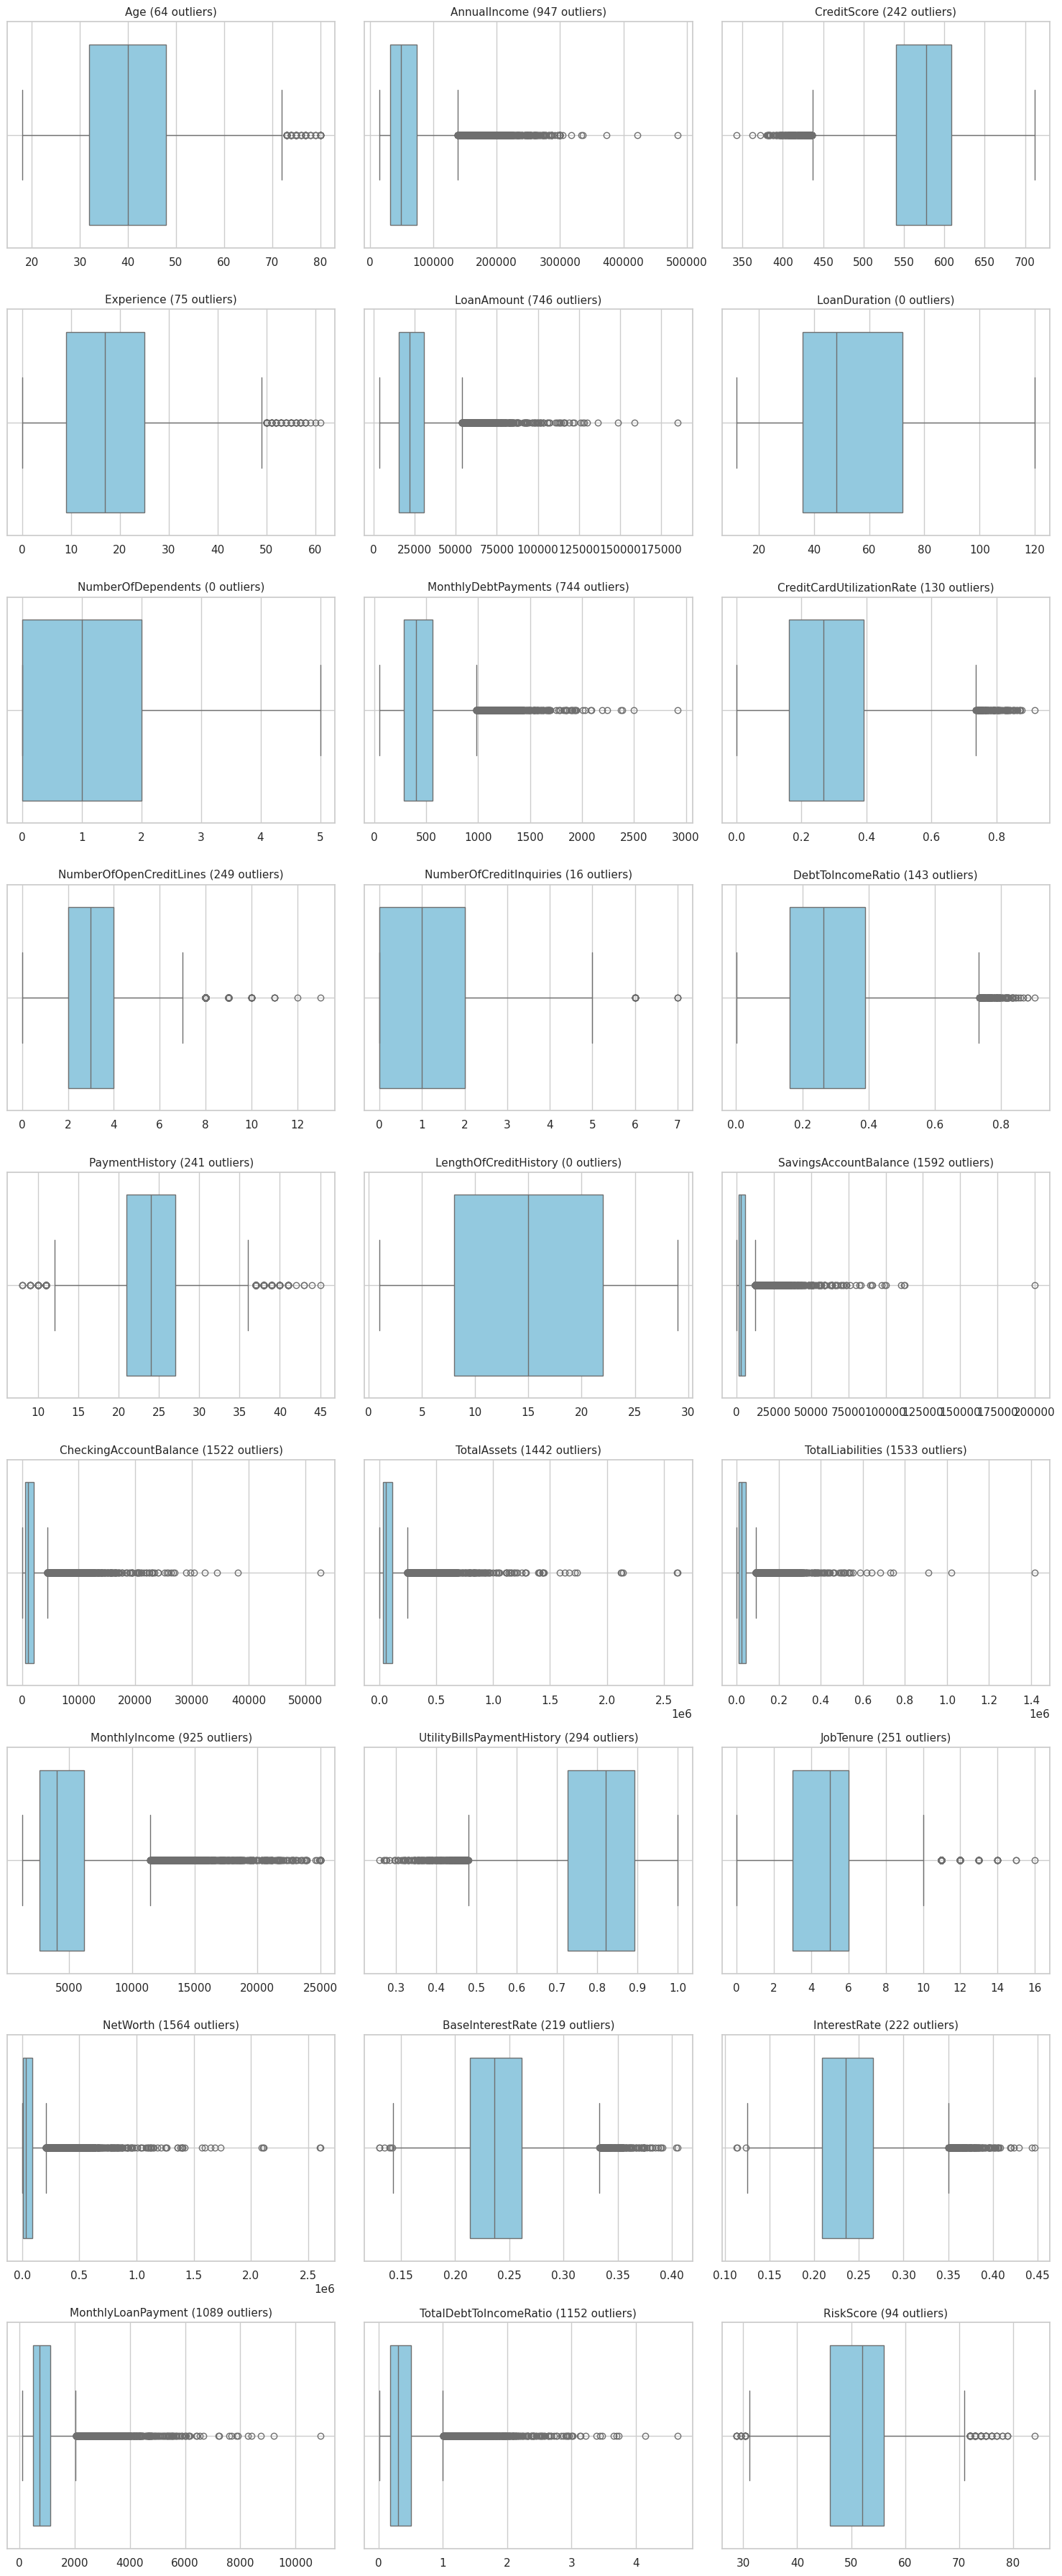

Outliers Column:
Age: 64 outliers
AnnualIncome: 947 outliers
CreditScore: 242 outliers
Experience: 75 outliers
LoanAmount: 746 outliers
MonthlyDebtPayments: 744 outliers
CreditCardUtilizationRate: 130 outliers
NumberOfOpenCreditLines: 249 outliers
NumberOfCreditInquiries: 16 outliers
DebtToIncomeRatio: 143 outliers
PaymentHistory: 241 outliers
SavingsAccountBalance: 1592 outliers
CheckingAccountBalance: 1522 outliers
TotalAssets: 1442 outliers
TotalLiabilities: 1533 outliers
MonthlyIncome: 925 outliers
UtilityBillsPaymentHistory: 294 outliers
JobTenure: 251 outliers
NetWorth: 1564 outliers
BaseInterestRate: 219 outliers
InterestRate: 222 outliers
MonthlyLoanPayment: 1089 outliers
TotalDebtToIncomeRatio: 1152 outliers
RiskScore: 94 outliers


In [9]:
numerical_columns = explore_df.select_dtypes(include=["int64", "float64"]).columns

# Ubah ke dalam dataframe
numerical_df = pd.DataFrame(explore_df[numerical_columns])

outlier_summary = {}
# Set style
sns.set(style="whitegrid")

# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Jumlah kolom dalam grid
n_cols = 3
# Gunakan pembulatan ke atas agar cukup tempat untuk semua variabel
n_rows = math.ceil(len(numerical_columns) / n_cols)
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Loop untuk membuat boxplot tiap variabel
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color='skyblue')
    outliers = detect_outliers_iqr(df, col)
    if len(outliers) > 0:
        outlier_summary[col] = len(outliers)
    axes[i].set_title(f"{col} ({len(outliers)} outliers)", fontsize=11)
    axes[i].set_xlabel("")
    axes[i].grid(True)

# Hapus subplot kosong jika ada
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Outliers Column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

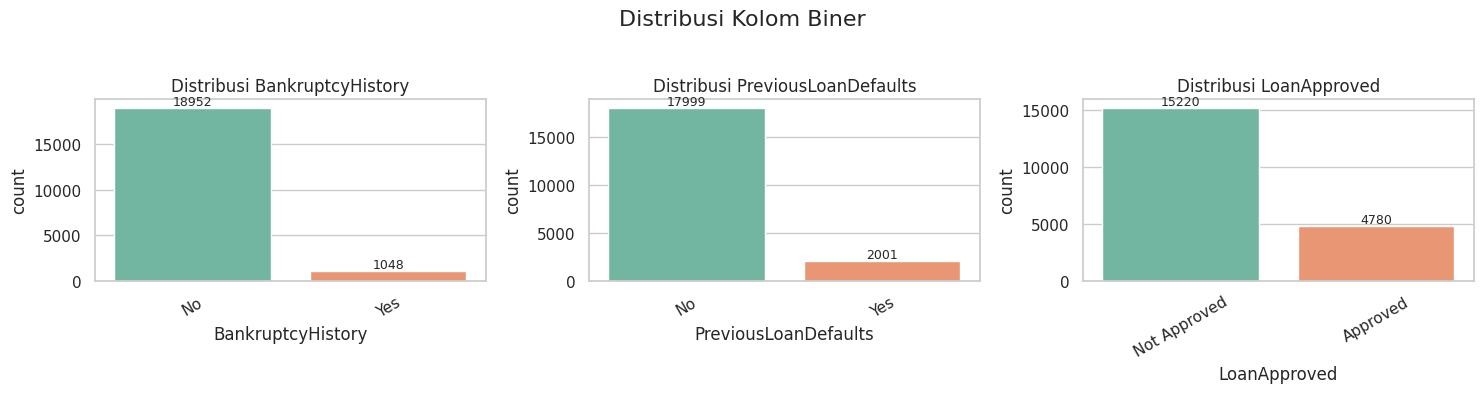

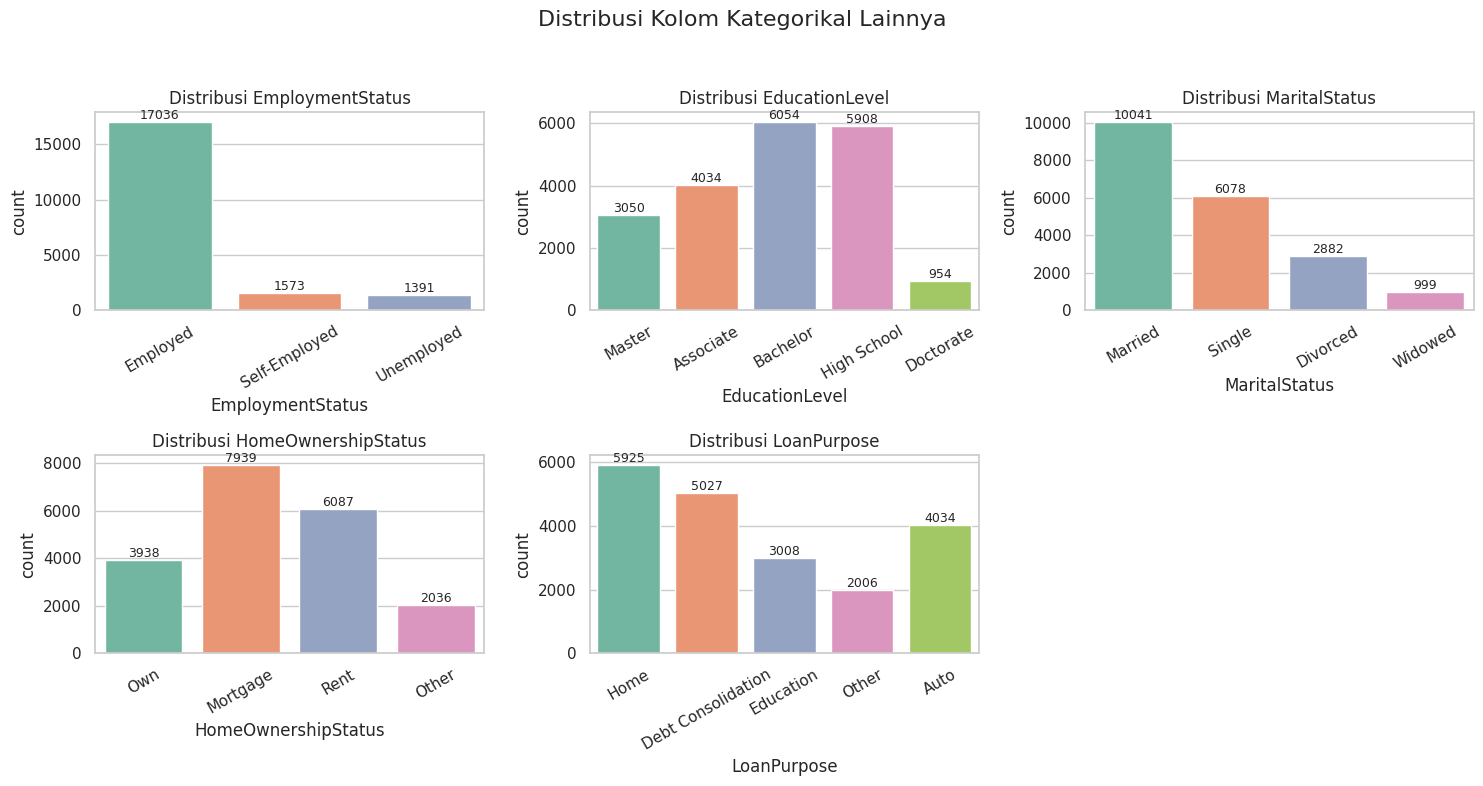

In [10]:
binary_cols = ['BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved']
categorical_cols = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

def plot_multiple_categorical(df, cols, title, cols_per_row=3):
    n = len(cols)
    rows = (n + cols_per_row - 1) // cols_per_row  # jumlah baris
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    axes = axes.flatten()  # untuk iterasi lebih mudah

    for i, col in enumerate(cols):
        sns.countplot(x=col, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f'Distribusi {col}')
        axes[i].tick_params(axis='x', rotation=30)
        
        # Tambah angka di atas bar
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].annotate(f'{int(height)}',
                             (p.get_x() + p.get_width() / 2., height),
                             ha='center', va='bottom', fontsize=9)

    # Hapus axes yang tidak terpakai
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
plot_multiple_categorical(explore_df, binary_cols, title='Distribusi Kolom Biner')
plot_multiple_categorical(explore_df, categorical_cols, title='Distribusi Kolom Kategorikal Lainnya', cols_per_row=3)

<Figure size 2000x1800 with 0 Axes>

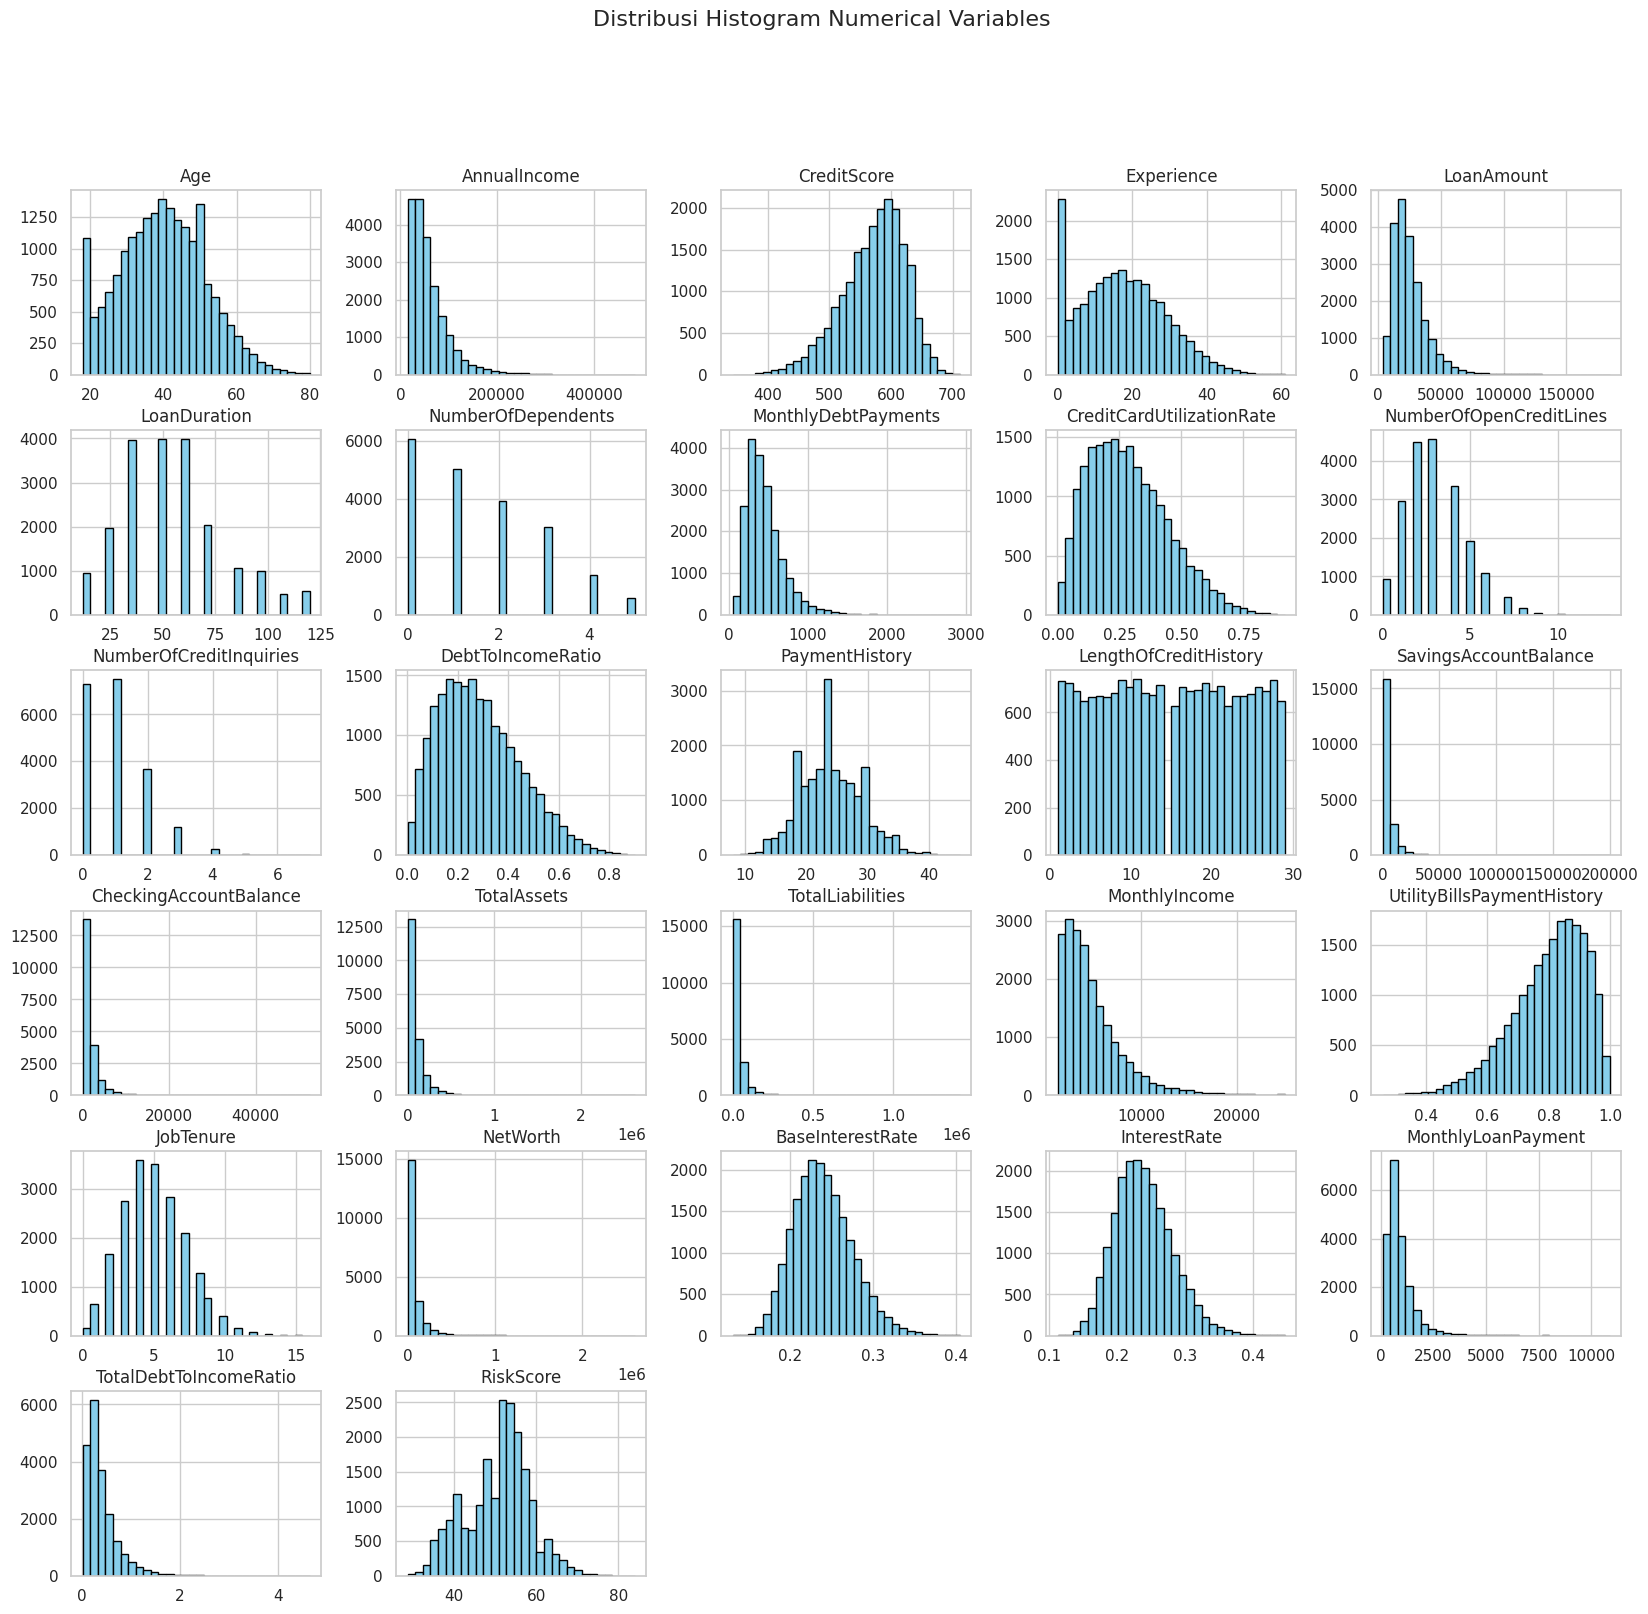

In [11]:
plt.figure(figsize=(20, 18))

# Histogram untuk distribusi visual numerik
explore_df.select_dtypes(include=["int64", "float64"]).hist(bins=30, figsize=(20, 18), color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Histogram Numerical Variables", fontsize=16)
plt.show()

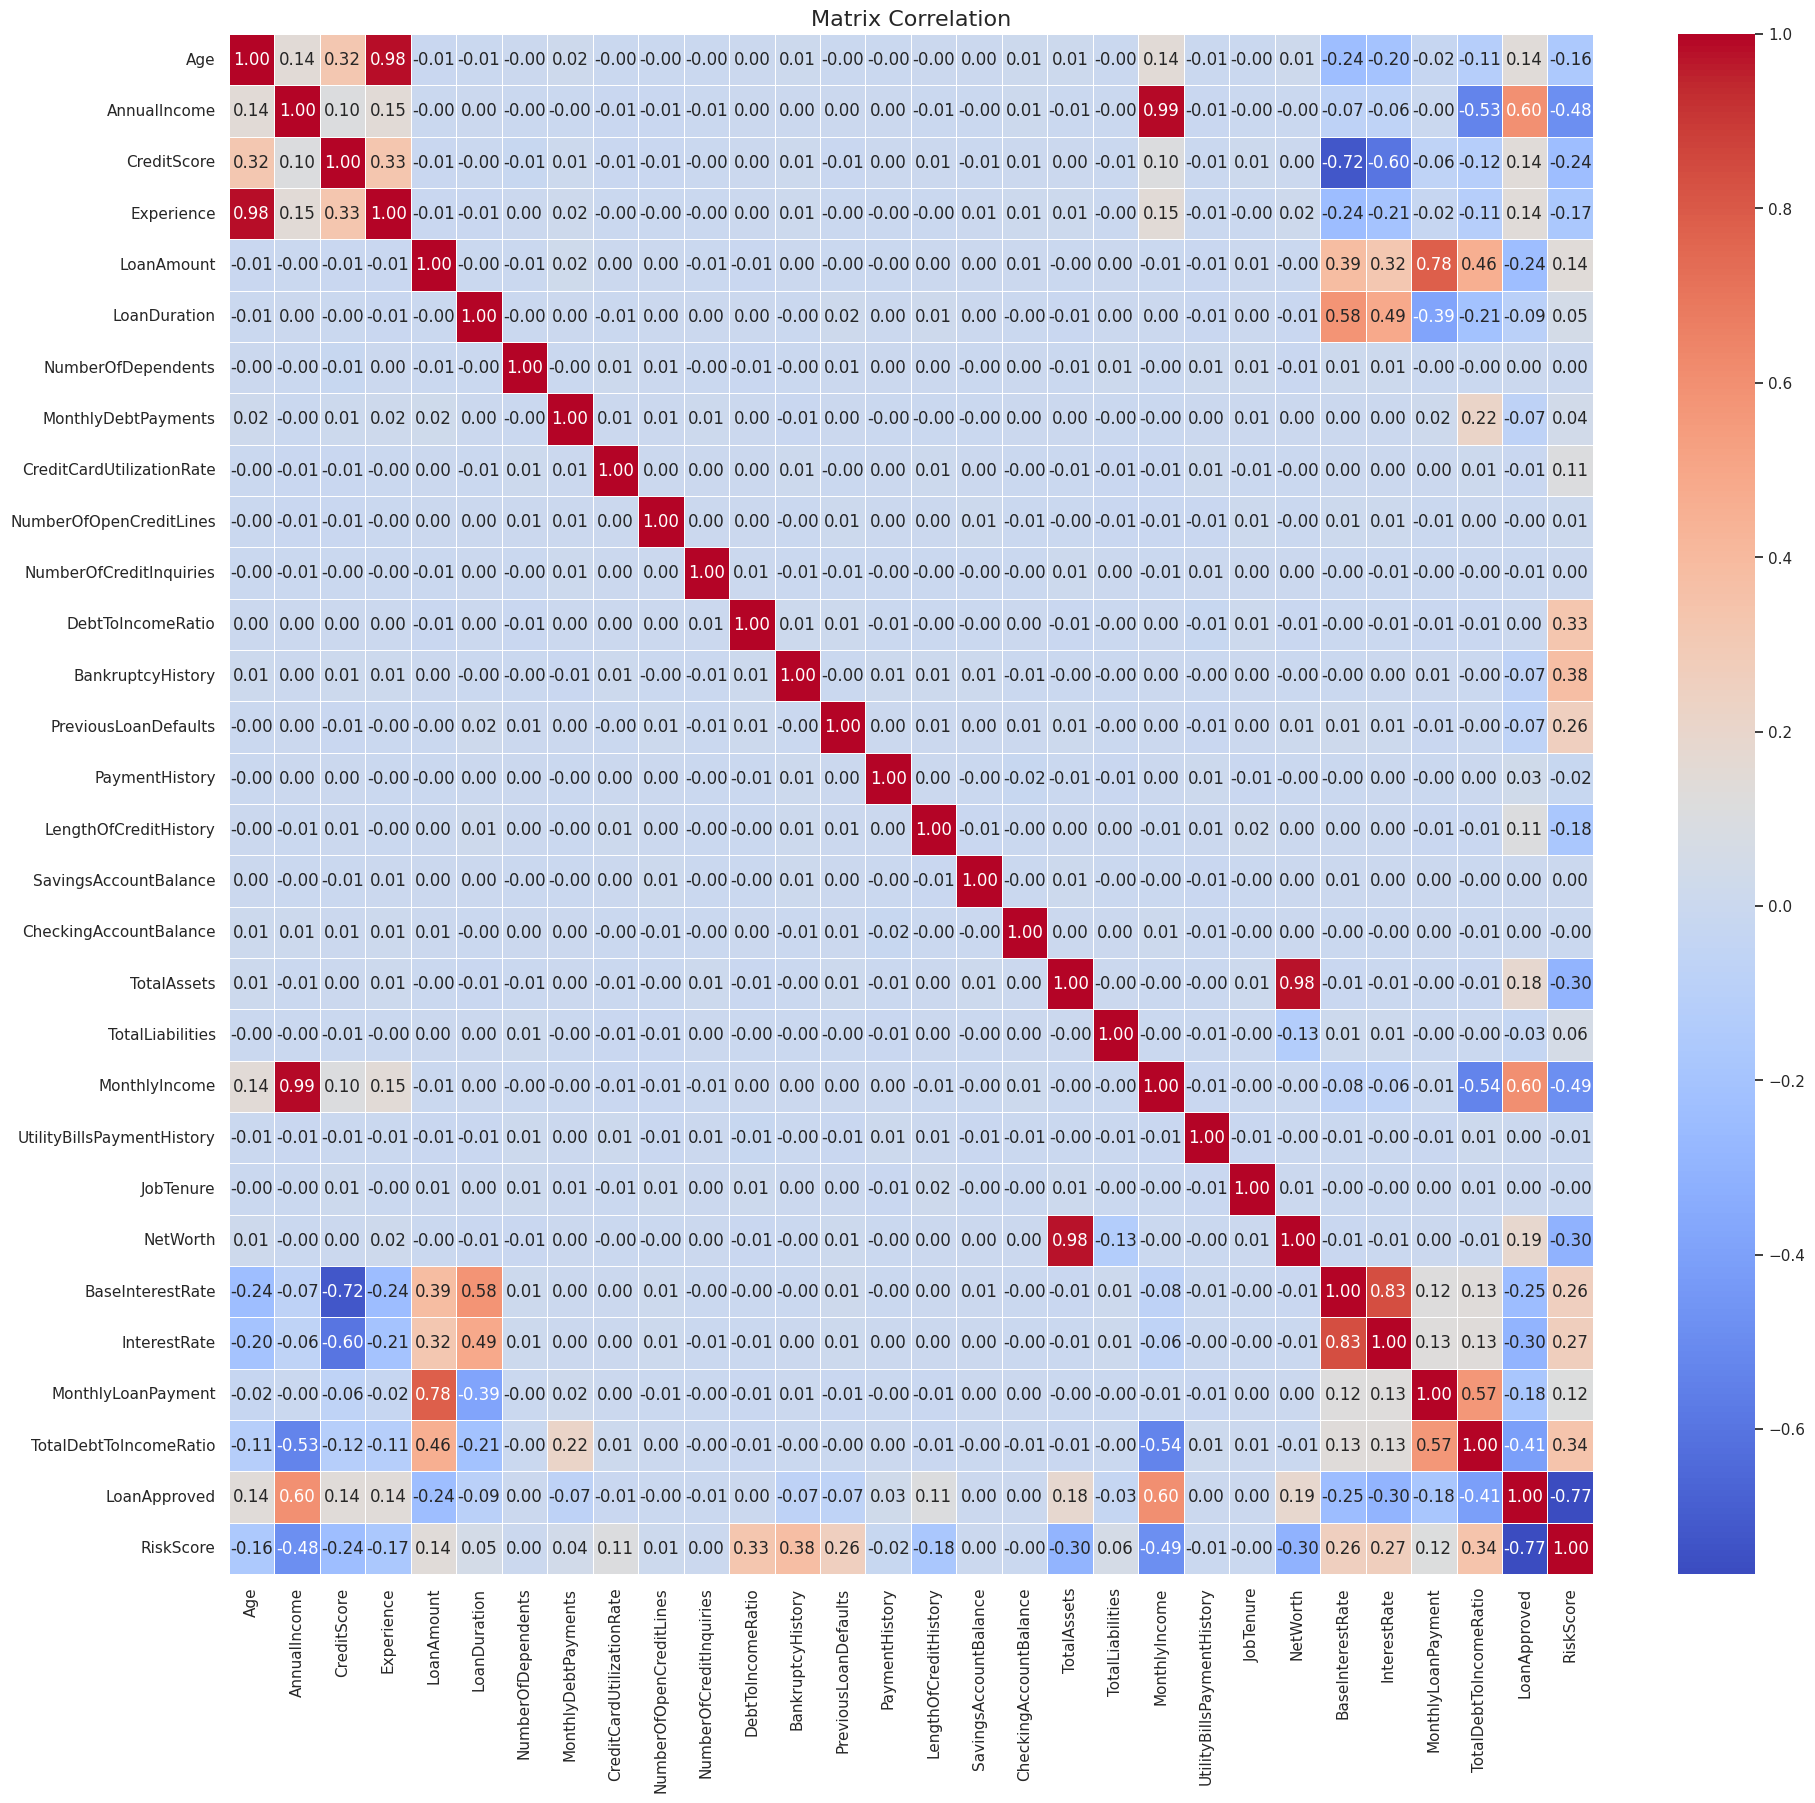

In [12]:
numerical_columns_corr = df.select_dtypes(include=["int64", "float64"]).columns
# Ubah ke dalam dataframe
numerical_corr_df = pd.DataFrame(df[numerical_columns_corr])
corr = numerical_corr_df.corr()

# Plot heatmap 
plt.figure(figsize=(22, 20))
corr_matrix = numerical_corr_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrix Correlation", fontsize=16)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Load Data Preprocessing**

In [13]:
preprocessing_df = df.copy()
preprocessing_df = preprocessing_df.drop(['ApplicationDate'], axis=1)
preprocessing_df.head().T

,0,1,2,3,4
Age,45,38,47,58,37
AnnualIncome,39948,39709,40724,69084,103264
CreditScore,617,628,570,545,594
EmploymentStatus,Employed,Employed,Employed,Employed,Employed
EducationLevel,Master,Associate,Bachelor,High School,Associate
Experience,22,15,26,34,17
LoanAmount,13152,26045,17627,37898,9184
LoanDuration,48,48,36,96,36
MaritalStatus,Married,Single,Married,Single,Married
NumberOfDependents,2,1,2,1,1


## **Splitting Data**

(19000, 35)
(1000, 35)


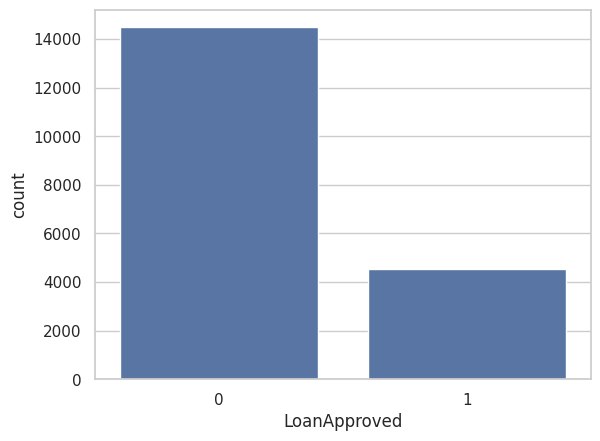

LoanApproved
0    14484
1     4516
Name: count, dtype: int64


In [14]:
train_df, test_df = train_test_split(preprocessing_df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

sns.countplot(data=train_df, x="LoanApproved")
plt.show()
print(train_df.LoanApproved.value_counts())

## **OverSampling**

(14484, 35)

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
21500,59,84706,647,Employed,Master,33,12271,60,Divorced,3,...,7058.833333,0.739740,7,7316,0.193771,0.184508,314.619850,0.093446,1,38.4
22993,76,91120,686,Employed,High School,58,32018,36,Divorced,2,...,7593.333333,0.572428,8,110694,0.174018,0.154031,1116.244968,0.203369,1,30.4
14736,21,156576,597,Employed,Bachelor,0,8981,96,Married,3,...,13048.000000,0.630662,6,20658,0.245481,0.261736,224.130784,0.055191,1,40.8
21740,23,39478,554,Employed,High School,0,25284,24,Married,0,...,3289.833333,0.859829,9,4790,0.223284,0.194832,1280.474566,0.507769,0,55.0
1554,46,56379,605,Employed,High School,25,27501,48,Single,3,...,4698.250000,0.732423,5,673461,0.220001,0.232119,884.643002,0.302803,1,32.0


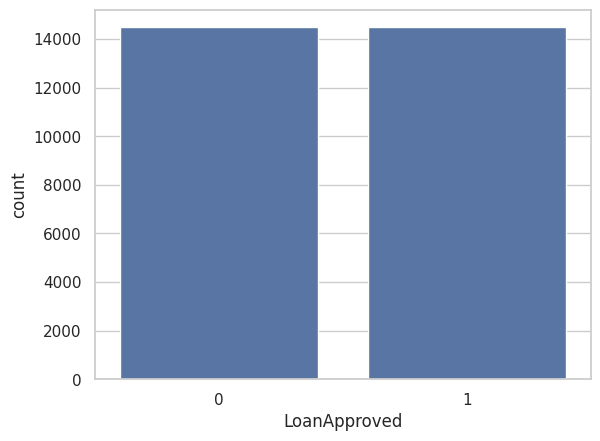

In [15]:
df_majority = train_df[(train_df.LoanApproved == 0)]
df_minority = train_df[(train_df.LoanApproved == 1)]

df_minority_oversampled = resample(df_minority, n_samples=14484, random_state=42)

display(df_minority_oversampled.shape)

oversampled_train_df = pd.concat([df_majority, df_minority_oversampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
display(oversampled_train_df.sample(5))
sns.countplot(data=oversampled_train_df, x="LoanApproved")
plt.show()

## **Targeting Fitur**

In [16]:
X_train = oversampled_train_df.drop(columns="LoanApproved", axis=1)
y_train = oversampled_train_df["LoanApproved"]
 
X_test = test_df.drop(columns="LoanApproved", axis=1)
y_test = test_df["LoanApproved"]

## **Func Scaling & Encoding**

In [17]:
def scaling(features, df, df_test=None):
    os.makedirs("model/scaling", exist_ok=True)
    
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaling/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
            print(f"Scaling feature: {feature}")
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaling/scaler_{}.joblib".format(feature))
        return df
 
def encoding(features, df, df_test=None):
    os.makedirs("model/encoding", exist_ok=True)

    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            
            # Gabungkan data training dan testing untuk menghindari unseen labels
            combined_data = pd.concat([df[feature], df_test[feature]], axis=0)
            encoder.fit(combined_data)

            df[feature] = encoder.transform(df[feature])
            df_test[feature] = encoder.transform(df_test[feature])
            
            joblib.dump(encoder, f"model/encoding/encoder_{feature}.joblib")
            print(f"Encoding feature: {feature}")
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"model/encoding/encoder_{feature}.joblib")
        return df

In [18]:
numerical_columns_model = X_train.select_dtypes(include=["int64", "float64"]).columns.drop('LoanApproved', errors='ignore')
categorical_columns_model = X_train.select_dtypes(include=["object"]).columns.drop('LoanApproved', errors='ignore')

# Ubah ke dalam dataframe
numerical_model_df = pd.DataFrame(preprocessing_df[numerical_columns_model])
categorical_model_df = pd.DataFrame(preprocessing_df[categorical_columns_model])

In [19]:
display(numerical_model_df.head())
display(categorical_model_df.head())

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,49.0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,52.0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,52.0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,36.0


,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,Employed,Master,Married,Own,Home
1,Employed,Associate,Single,Mortgage,Debt Consolidation
2,Employed,Bachelor,Married,Rent,Education
3,Employed,High School,Single,Mortgage,Home
4,Employed,Associate,Married,Mortgage,Debt Consolidation


In [20]:
new_train_df, new_test_df = scaling(numerical_columns_model, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns_model, new_train_df, new_test_df)

Scaling feature: Age
Scaling feature: AnnualIncome
Scaling feature: CreditScore
Scaling feature: Experience
Scaling feature: LoanAmount
Scaling feature: LoanDuration
Scaling feature: NumberOfDependents
Scaling feature: MonthlyDebtPayments
Scaling feature: CreditCardUtilizationRate
Scaling feature: NumberOfOpenCreditLines
Scaling feature: NumberOfCreditInquiries
Scaling feature: DebtToIncomeRatio
Scaling feature: BankruptcyHistory
Scaling feature: PreviousLoanDefaults
Scaling feature: PaymentHistory
Scaling feature: LengthOfCreditHistory
Scaling feature: SavingsAccountBalance
Scaling feature: CheckingAccountBalance
Scaling feature: TotalAssets
Scaling feature: TotalLiabilities
Scaling feature: MonthlyIncome
Scaling feature: UtilityBillsPaymentHistory
Scaling feature: JobTenure
Scaling feature: NetWorth
Scaling feature: BaseInterestRate
Scaling feature: InterestRate
Scaling feature: MonthlyLoanPayment
Scaling feature: TotalDebtToIncomeRatio
Scaling feature: RiskScore
Encoding feature: Em

## **PCA (Principal Component Analysis)**

In [21]:
# Demografi
pca_numericalColumns_1 = [
    "Age",
    "Experience",
    "CreditScore"
]
# Saldo Akun
pca_numericalColumns_2 = [
    "SavingsAccountBalance",
    "CheckingAccountBalance",
    "TotalAssets"
]
# Beban Utang
pca_numericalColumns_3 = [
    "InterestRate",
    "DebtToIncomeRatio",
    "TotalDebtToIncomeRatio",
    "RiskScore"
]
# Informasi Peminjaman
pca_numericalColumns_4 = [
    "LoanAmount",
    "MonthlyLoanPayment"
]
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

In [22]:
def apply_pca_and_transform(pca_features, train_df, test_df, pca_name):
    """ 
    Melakukan PCA dengan jumlah komponen efisien (min. 95% variansi), 
    menyimpan model, dan menambahkan principal components ke DataFrame.
    """
    # Inisialisasi PCA tanpa mengatur n_components
    pca = PCA(random_state=123)
    pca.fit(train_df[pca_features])

    # Hitung variansi kumulatif
    var_exp = pca.explained_variance_ratio_.round(3)
    cum_var_exp = np.cumsum(var_exp)
    
    # Tentukan jumlah komponen efisien (>=95% variansi kumulatif)
    n_components = np.argmax(cum_var_exp >= 0.95) + 1
    print(f"🔍 Optimal number of components for {pca_name}: {n_components} (cumulative variance ≥ 95%)")

    # Visualisasi Explained Variance
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='Individual Variance')
    plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='Cumulative Variance', color='red')
    plt.axhline(y=0.95, color='green', linestyle='--', label='95% Threshold')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Component Index')
    plt.title(f'PCA Explained Variance for {pca_name}')
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Ulang PCA dengan n_components optimal
    pca = PCA(n_components=n_components, random_state=123)
    pca.fit(train_df[pca_features])
    
    # Simpan model PCA
    joblib.dump(pca, f"model/pca_{pca_name}.joblib")
    print(f"📌 PCA Model for '{pca_name}' saved as 'model/pca_{pca_name}.joblib'.")
    
    # Transform data
    princ_comp_train = pca.transform(train_df[pca_features])
    princ_comp_test = pca.transform(test_df[pca_features])

    # Membuat nama kolom baru
    pca_columns = [f"{pca_name}_{i+1}" for i in range(n_components)]
    
    # Tambahkan Principal Components ke DataFrame
    train_df[pca_columns] = pd.DataFrame(princ_comp_train, columns=pca_columns, index=train_df.index)
    test_df[pca_columns] = pd.DataFrame(princ_comp_test, columns=pca_columns, index=test_df.index)
    
    # Drop kolom asli yang digunakan di PCA
    train_df.drop(columns=pca_features, inplace=True)
    test_df.drop(columns=pca_features, inplace=True)
    print(f"\n📌 Features for '{pca_name}' successfully replaced with {n_components} Principal Components.\n")

    return train_df, test_df

🔍 Optimal number of components for pc1: 2 (cumulative variance ≥ 95%)


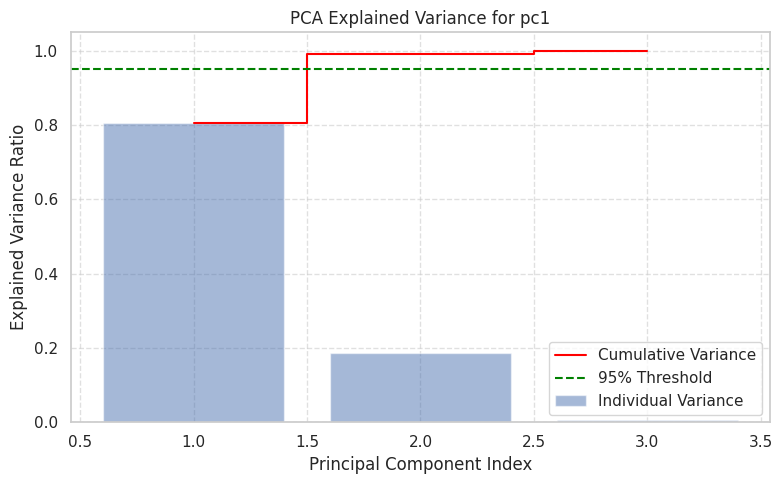

📌 PCA Model for 'pc1' saved as 'model/pca_pc1.joblib'.

📌 Features for 'pc1' successfully replaced with 2 Principal Components.

🔍 Optimal number of components for pc2: 3 (cumulative variance ≥ 95%)


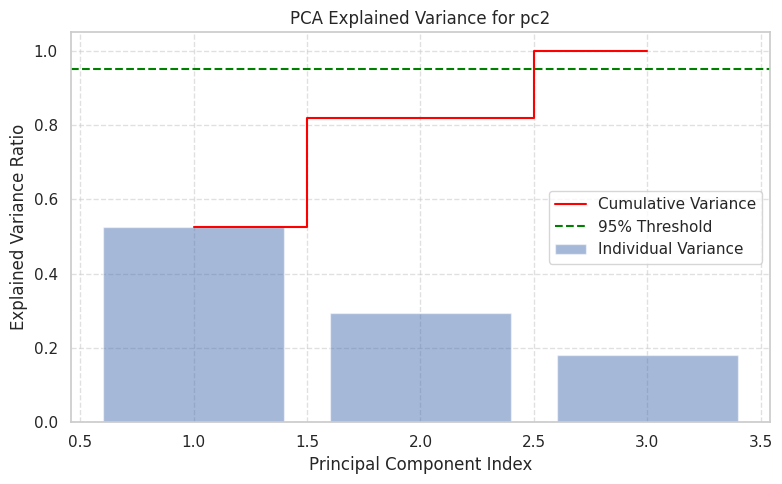

📌 PCA Model for 'pc2' saved as 'model/pca_pc2.joblib'.

📌 Features for 'pc2' successfully replaced with 3 Principal Components.

🔍 Optimal number of components for pc3: 3 (cumulative variance ≥ 95%)


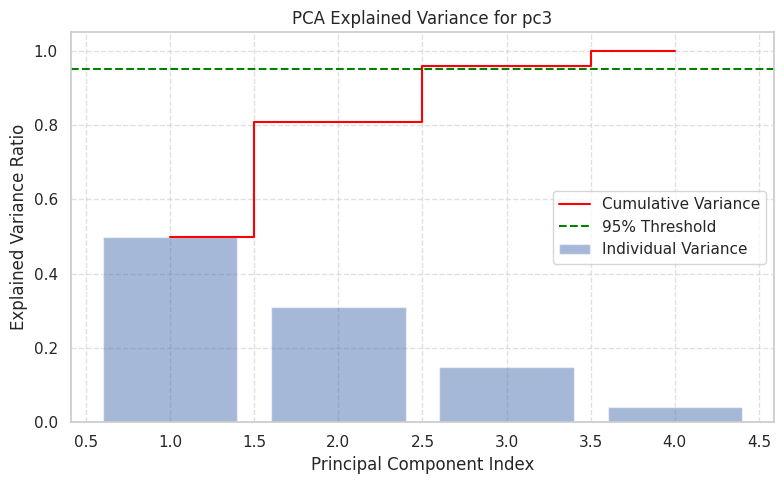

📌 PCA Model for 'pc3' saved as 'model/pca_pc3.joblib'.

📌 Features for 'pc3' successfully replaced with 3 Principal Components.

🔍 Optimal number of components for pc4: 2 (cumulative variance ≥ 95%)


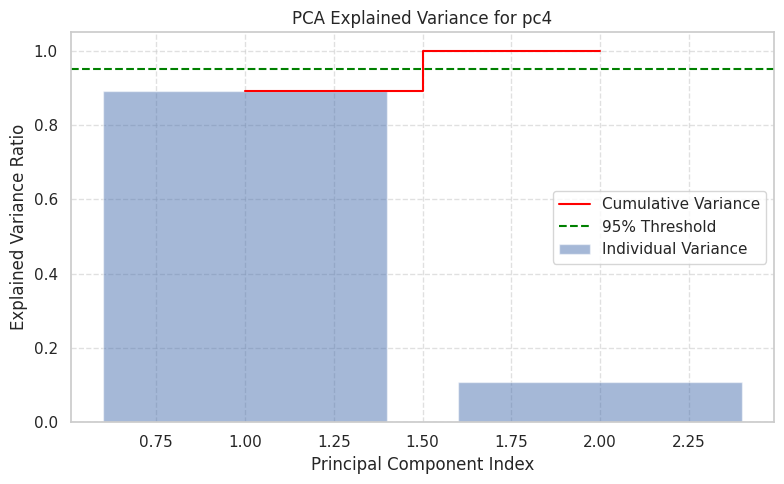

📌 PCA Model for 'pc4' saved as 'model/pca_pc4.joblib'.

📌 Features for 'pc4' successfully replaced with 2 Principal Components.



In [23]:
train_pca_df, test_pca_df = apply_pca_and_transform(
    pca_features=pca_numericalColumns_1, 
    train_df=train_pca_df, 
    test_df=test_pca_df,
    pca_name="pc1"
)
train_pca_df, test_pca_df = apply_pca_and_transform(
    pca_features=pca_numericalColumns_2, 
    train_df=train_pca_df, 
    test_df=test_pca_df,
    pca_name="pc2"
)
train_pca_df, test_pca_df = apply_pca_and_transform(
    pca_features=pca_numericalColumns_3, 
    train_df=train_pca_df, 
    test_df=test_pca_df,
    pca_name="pc3"
)
train_pca_df, test_pca_df = apply_pca_and_transform(
    pca_features=pca_numericalColumns_4, 
    train_df=train_pca_df, 
    test_df=test_pca_df,
    pca_name="pc4"
)

In [24]:
# Tampilkan hasil akhir
print("\n📌 DataFrame setelah PCA:")
display(train_pca_df.head())
display(test_pca_df.head())


📌 DataFrame setelah PCA:


,AnnualIncome,EmploymentStatus,EducationLevel,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,pc1_1,pc1_2,pc2_1,pc2_2,pc2_3,pc3_1,pc3_2,pc3_3,pc4_1,pc4_2
0,0.057917,1,4,0.333333,1,0.4,0,0.148484,0.549682,0.230769,...,-0.322899,0.148173,0.127039,-0.032038,-0.018151,0.119903,-0.193086,0.071860,-0.015805,-0.006187
1,0.143943,0,0,0.444444,1,0.4,0,0.157895,0.565082,0.230769,...,-0.151100,-0.185445,-0.033073,-0.025349,-0.003695,-0.249167,0.025615,-0.008947,-0.039402,-0.008090
2,0.042746,0,1,0.000000,1,0.4,3,0.138376,0.450049,0.076923,...,0.286431,0.132027,0.081704,-0.024564,-0.010675,0.036571,-0.077387,-0.251239,0.159252,0.118513
3,0.142255,0,1,0.333333,1,0.4,1,0.221331,0.141688,0.230769,...,0.036200,-0.086450,-0.023919,-0.007237,0.016794,0.264517,-0.235263,-0.026576,0.003870,-0.012826
4,0.160111,0,4,0.666667,0,0.6,2,0.223423,0.419156,0.076923,...,0.051074,-0.281411,0.017120,0.013515,-0.008199,-0.107907,0.271577,0.227666,0.069625,-0.023711


,AnnualIncome,EmploymentStatus,EducationLevel,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,pc1_1,pc1_2,pc2_1,pc2_2,pc2_3,pc3_1,pc3_2,pc3_3,pc4_1,pc4_2
0,0.210467,0,3,0.666667,2,0.0,0,0.013245,0.305513,0.230769,...,-0.053190,0.089731,-0.038808,-0.006557,-0.013079,0.066145,-0.173972,0.065825,0.014354,-0.031008
1,0.427393,0,3,0.444444,1,0.4,0,0.125828,0.314869,0.153846,...,-0.188892,-0.143627,-0.025917,0.036947,-0.002765,-0.196640,0.037676,0.155730,-0.079222,0.004393
2,0.143006,0,3,0.333333,3,0.0,2,0.136633,0.559765,0.307692,...,-0.002661,-0.258152,-0.013810,-0.002834,0.001416,0.042099,0.288009,0.207659,0.059059,-0.002149
3,0.103355,0,4,0.000000,1,0.6,3,0.125131,0.279150,0.076923,...,-0.078690,-0.438037,-0.040119,-0.006970,0.000900,-0.033299,0.181280,0.067977,0.069308,0.096408
4,0.113269,0,4,0.333333,0,0.0,3,0.168351,0.235400,0.461538,...,-0.028856,-0.063023,-0.014479,0.006899,0.020286,-0.042210,0.135879,-0.008015,0.049048,-0.014210


## **Ekspor Dataset**

In [26]:
y_train = oversampled_train_df['LoanApproved']
y_test = test_df['LoanApproved']
train_final = pd.concat([train_pca_df, y_train.reset_index(drop=True)], axis=1)
test_final = pd.concat([test_pca_df, y_test.reset_index(drop=True)], axis=1)

train_final.to_csv('preprocessing/train_pca.csv', index=False)
test_final.to_csv('preprocessing/test_pca.csv', index=False)